# Homework 3 
### ASTROINFORMATICS

## Problem 1

We learned this week that the posterior pdf for $b$, the tail probability when
flipping a coin, with a flat prior in the range 0-1, is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$
where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

Get a coin, flip it 8 times and record the results.

a) plot $p(b \,|\, k, N )$ after each flip. Every time show the previous (prior) $p(b)$
and the posterior $p(b)$. 

b) After all 8 flips, what is the probability that your coin strongly prefers
heads over tails: what is the probability $p(b<0.25\,|\, k, N )$)? 


## Problem 2

Fit polynomials of up to the 5th order to the provided dataset.
Use BIC to find the best model for this dataset.

## Problem 3 

Apply Bayesian Blocks Algorithm to period distribution (logP) of LINEAR variable stars. 
Plot histograms on both linear and log scale. Compare the result to classical (Knuth's) 
uniform bin width histogram. 


### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from astroML.datasets import fetch_LINEAR_geneva
from astroML.plotting import setup_text_plots
from astroML.plotting import hist
setup_text_plots(fontsize=8, usetex=True)

## Problem 1: the coin flip

In [2]:
%matplotlib inline

from scipy.stats import norm
np.random.seed(42)
flipData = [0, 1, 0, 0, 0, 1, 1, 0] #my data set
mu = np.average(flipData) #average of the whole data set
sigma =np.std(flipData) #standard deviation of the whole data set

Text(0.5,1,'ALL')

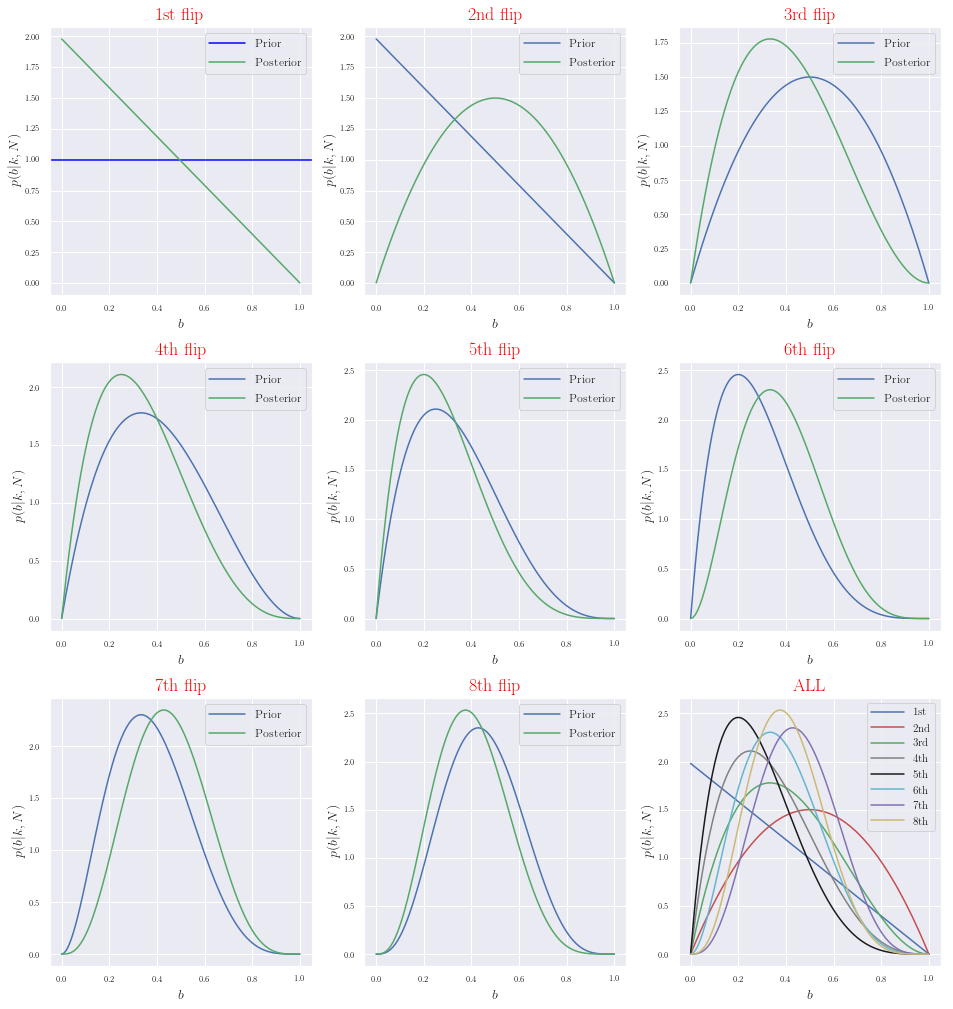

In [3]:
b = np.linspace(0, 1, 100)
db = b[1] - b[0]
pb0=[] #create an empty array to store the pdf function after each coin flip

#define number of successes from draws above as k and set first value of the k depending on the first value from the
#data set

if flipData[0]==1: 
    k=1
else:
    k=0

#iterate via the array with coint flip data and calculate the probability after each coin flip
for position, data in enumerate(flipData): 
    n=position+1
    if data == 1:
        if position > 0:
            k=k+1
    p_b = b ** k * (1 - b) ** (n - k)
    p_b /= p_b.sum()
    p_b /= db
    pb0.append(p_b) #put calculated pdf p(b|k,N) into the array defined above to plot them

#plot pdf p(b|k,N) after each flip with showing the previous (prior) $p(b)$ and the posterior $p(b)$
fig, ax = plt.subplots(figsize=(15, 15), nrows=3, ncols=3)
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.25)
ax[0,0].axhline(y=1,color='blue',label='Prior')
ax[0,0].plot(b, pb0[0], '-g',label='Posterior')
ax[0,0].set_title('1st flip',fontsize=18, color='red')
ax[0,0].legend(loc='upper right',fontsize=12)
ax[0,0].set_xlabel('$b$',fontsize=14)
ax[0,0].set_ylabel('$p(b|k,N)$',fontsize=14)


ax[0,1].plot(b, pb0[0], '-b', label='Prior')
ax[0,1].plot(b, pb0[1], '-g', label='Posterior')
ax[0,1].set_title('2nd flip',fontsize=18, color='red')
ax[0,1].legend(loc='upper right',fontsize=12)
ax[0,1].set_xlabel('$b$',fontsize=14)
ax[0,1].set_ylabel('$p(b|k,N)$',fontsize=14)

ax[0,2].plot(b, pb0[1], '-b', label='Prior')
ax[0,2].plot(b, pb0[2], '-g', label='Posterior')
ax[0,2].set_title('3rd flip',fontsize=18, color='red')
ax[0,2].legend(loc='upper right',fontsize=12)
ax[0,2].set_xlabel('$b$',fontsize=14)
ax[0,2].set_ylabel('$p(b|k,N)$',fontsize=14)

ax[1,0].plot(b, pb0[2], '-b', label='Prior')
ax[1,0].plot(b, pb0[3], '-g', label='Posterior')
ax[1,0].set_title('4th flip',fontsize=18, color='red')
ax[1,0].legend(loc='upper right',fontsize=12)
ax[1,0].set_xlabel('$b$',fontsize=14)
ax[1,0].set_ylabel('$p(b|k,N)$',fontsize=14)

ax[1,1].plot(b, pb0[3], '-b', label='Prior')
ax[1,1].plot(b, pb0[4], '-g', label='Posterior')
ax[1,1].set_title('5th flip',fontsize=18, color='red')
ax[1,1].legend(loc='upper right',fontsize=12)
ax[1,1].set_xlabel('$b$',fontsize=14)
ax[1,1].set_ylabel('$p(b|k,N)$',fontsize=14)

ax[1,2].plot(b, pb0[4], '-b', label='Prior')
ax[1,2].plot(b, pb0[5], '-g', label='Posterior')
ax[1,2].set_title('6th flip',fontsize=18, color='red')
ax[1,2].legend(loc='upper right',fontsize=12)
ax[1,2].set_xlabel('$b$',fontsize=14)
ax[1,2].set_ylabel('$p(b|k,N)$',fontsize=14)

ax[2,0].plot(b, pb0[5], '-b', label='Prior')
ax[2,0].plot(b, pb0[6], '-g', label='Posterior')
ax[2,0].set_title('7th flip',fontsize=18, color='red')
ax[2,0].legend(loc='upper right',fontsize=12)
ax[2,0].set_xlabel('$b$',fontsize=14)
ax[2,0].set_ylabel('$p(b|k,N)$',fontsize=14)

ax[2,1].plot(b, pb0[6], '-b', label='Prior')
ax[2,1].plot(b, pb0[7], '-g', label='Posterior')
ax[2,1].set_title('8th flip',fontsize=18, color='red')
ax[2,1].legend(loc='upper right',fontsize=12)
ax[2,1].set_xlabel(r'$b$',fontsize=14)
ax[2,1].set_ylabel(r'$p(b|k,N)$',fontsize=14)

ax[2,2].plot(b, pb0[0], '-b', label='1st')
ax[2,2].plot(b, pb0[1], '-r', label='2nd')
ax[2,2].plot(b, pb0[2], '-g', label='3rd')
ax[2,2].plot(b, pb0[3], color='grey', label='4th')
ax[2,2].plot(b, pb0[4], '-k', label='5th')
ax[2,2].plot(b, pb0[5], '-c', label='6th')
ax[2,2].plot(b, pb0[6], '-m', label='7th')
ax[2,2].plot(b, pb0[7], '-y', label='8th')
ax[2,2].legend(loc='upper right',fontsize=11)
ax[2,2].set_xlabel(r'$b$',fontsize=14)
ax[2,2].set_ylabel(r'$p(b|k,N)$',fontsize=14)
ax[2,2].set_title('ALL',fontsize=18, color='red')

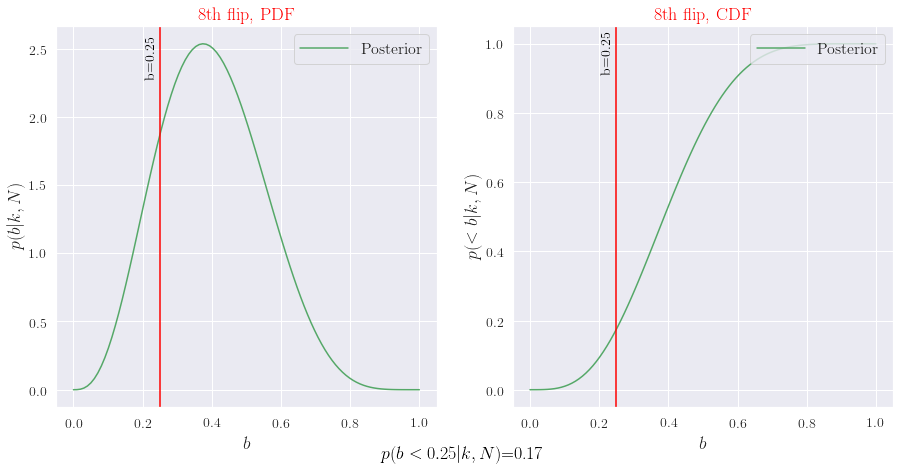

In [4]:
cuml_p_b = pb0[7].cumsum()
cuml_p_b /= cuml_p_b[-1]

fig8, ax8 = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
ax8[0].plot(b, pb0[7], '-g', label='Posterior')
ax8[0].axvline(x=0.25,color='red')
ax8[0].text(0.25-0.05, 2.5,r'b=0.25', rotation=90, fontsize=14,color='black')
ax8[0].set_title('8th flip, PDF',fontsize=18, color='red')
ax8[0].legend(loc='upper right',fontsize=16)
ax8[0].tick_params(direction='out', length=6, width=2, labelsize=14)
ax8[0].set_xlabel(r'$b$',fontsize=18)
ax8[0].set_ylabel(r'$p(b|k,N)$',fontsize=18)

ax8[1].plot(b, cuml_p_b, '-g', label='Posterior')
ax8[1].axvline(x=0.25,color='red')
ax8[1].text(0.25-0.05, 1.0,r'b=0.25', rotation=90, fontsize=14,color='black')
ax8[1].set_title('8th flip, CDF',fontsize=18, color='red')
ax8[1].legend(loc='upper right',fontsize=16)
ax8[1].tick_params(direction='out', length=6, width=2, labelsize=14)
ax8[1].set_xlabel(r'$b$',fontsize=18)
ax8[1].set_ylabel(r'$p(<b|k,N)$',fontsize=18)

st = fig8.suptitle(r'$p(b<0.25|k,N)$=0.17',fontsize=18,color='black')
st.set_y(0.05)

From the CDF plot above we can see that the probability that a coin strongly prefers heads over tails $p(b<0.25\,|\, k, N )$) is equal to 0.17. I found this value directly from the plot by changing from %matplotlib inline regime to %matplotlib notebook regime in order to get interactive plots that allow to read (x,y) values from the plot.

## Problem 2: use BIC to find the best polynomial model for a given dataset

In [5]:
from scipy import stats
from scipy import optimize

# this function computes polynomial models given some data x
# and parameters theta
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, x, y, sigma_y, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, x, y, sigma_y, model=polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, x, y, sigma_y, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

In [6]:
# generate (noisy) data
np.random.seed(0)
Ndata = 22
x = np.linspace(0, 3, Ndata)[1:-1]
sigma_y = 0.1 + 0*x
y = np.random.normal(np.sin(x) * x, sigma_y) 

Text(0,0.5,'y')

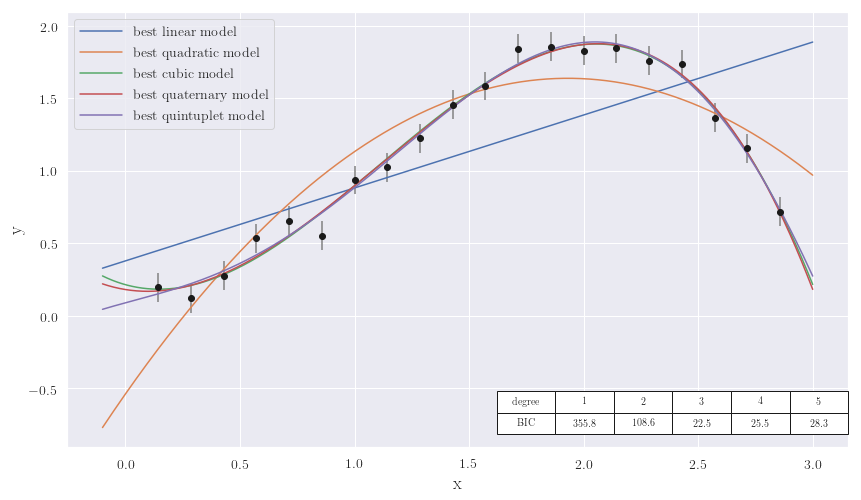

In [7]:
theta1 = best_theta(1, x, y, sigma_y, model=polynomial_fit)
theta2 = best_theta(2, x, y, sigma_y, model=polynomial_fit)
theta3 = best_theta(3, x, y, sigma_y, model=polynomial_fit)
theta4 = best_theta(4, x, y, sigma_y, model=polynomial_fit)
theta5 = best_theta(5, x, y, sigma_y, model=polynomial_fit)


xfit = np.linspace(-0.1, 3, 1000)
yfit1 = polynomial_fit(theta1, xfit)
yfit2 = polynomial_fit(theta2, xfit)
yfit3 = polynomial_fit(theta3, xfit)
yfit4 = polynomial_fit(theta4, xfit)
yfit5 = polynomial_fit(theta5, xfit)

chi1 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2)
chi2 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2)
chi3 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
chi4 = np.sum(((y-polynomial_fit(theta4, x))/sigma_y)**2) 
chi5 = np.sum(((y-polynomial_fit(theta5, x))/sigma_y)**2) 

BIC1=(chi1)+2*np.log(Ndata)
BIC2=(chi2)+3*np.log(Ndata)
BIC3=(chi3)+4*np.log(Ndata)
BIC4=(chi4)+5*np.log(Ndata)
BIC5=(chi5)+6*np.log(Ndata)

fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.plot(xfit, polynomial_fit(theta3, xfit), label='best cubic model')
ax.plot(xfit, polynomial_fit(theta4, xfit), label='best quaternary model')
ax.plot(xfit, polynomial_fit(theta5, xfit), label='best quintuplet model')
the_table =(['degree', '1','2','3','4','5'],['BIC','%.1f'%BIC1,'%.1f'%BIC2,'%.1f'%BIC3,'%.1f'%BIC4,'%.1f'%BIC5])
l=plt.table(cellText=the_table,
rowLabels=None,
colLabels=None,
cellLoc = 'center',rowLoc = 'center',
loc='top', bbox=[0.55, 0.03, 0.45, 0.1])
l.set_zorder(10)

ax.legend(loc='best', fontsize=14)
ax.tick_params(direction='out', length=6, width=2, labelsize=14)
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


According to the definition of the BIC, the lower value of the BIC corresponds to the better model. Therefore, since the third order polynomial fit has the lowest BIC value of 22.5 we can assume that the third order polynomial is the best model for the given data set.  

## Problem 3
Compare Bayesian Blocks Algorithm and classsical histogram
on a sample of periodic variable stars.

(0.001, 10)

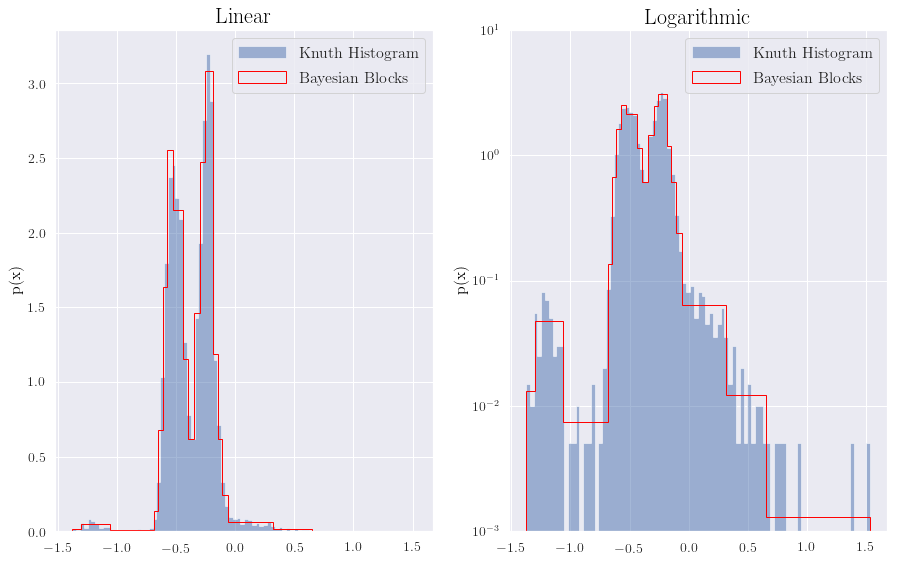

In [8]:
from astroML.plotting import hist
# fetch data
data = fetch_LINEAR_geneva()
x = data['logP']
N=len(x)

fig= plt.figure(figsize=(14, 8))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)
ax1 = fig.add_subplot(121)
hist(x, bins='knuth', density=True,
    histtype='stepfilled', alpha=0.5,
    label='Knuth Histogram')
hist(x, bins='blocks',density=True,
    histtype='step', color='red', alpha=0.99,
    label="Bayesian Blocks")
ax1.set_title('Linear', color='black',fontsize=22)
plt.legend(loc='upper right',fontsize=16)
ax1.tick_params(direction='out', length=6, width=2, labelsize=14,color='black')
plt.xlabel('',fontsize=16,color='black')
plt.ylabel('p(x)',fontsize=16,color='black')

ax2 = fig.add_subplot(122)
hist(x, bins='knuth', density=True,
    histtype='stepfilled', alpha=0.5,log=True,
    label='Knuth Histogram')
hist(x, bins='blocks',density=True,
    histtype='step', color='red', alpha=0.99, log=True,
    label="Bayesian Blocks")
ax2.set_title('Logarithmic', color='black',fontsize=22)
plt.legend(loc='upper right',fontsize=16)
ax2.tick_params(direction='out', length=6, width=2, labelsize=14,color='black')
plt.xlabel('',fontsize=16,color='black')
plt.ylabel('p(x)',fontsize=16,color='black')
plt.ylim(10**(-3), 10)

As we can see, the bin size for the Bayesian Blocks diagram is larger than the bin size for the Knuth (classical) histogram.